# Home 3: Build a CNN for image recognition.

### Name: [Bowen Li]


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2019F/blob/master/homework/HM3/HM3.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [2]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    res = []
    for ys in y:
        vec = [0]*num_class
        vec[ys[0]] = 1
        res.append(vec)
    return numpy.asarray(res)

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0 0 0 0 0 0 1 0 0 0]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

## 2.1 With more layers, dropout and batch normalization

In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)       

In [0]:
from keras import optimizers

opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [10]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 21s 528us/step - loss: 1.8481 - acc: 0.3358 - val_loss: 1.4405 - val_acc: 0.4764
Epoch 2/100
40000/40000 [==============================] - 21s 519us/step - loss: 1.5293 - acc: 0.4482 - val_loss: 1.2722 - val_acc: 0.5368
Epoch 3/100
40000/40000 [==============================] - 21s 518us/step - loss: 1.3849 - acc: 0.5082 - val_loss: 1.1800 - val_acc: 0.5748
Epoch 4/100
40000/40000 [==============================] - 21s 515us/step - loss: 1.2911 - acc: 0.5433 - val_loss: 1.1140 - val_acc: 0.6028
Epoch 5/100
40000/40000 [==============================] - 21s 514us/step - loss: 1.2058 - acc: 0.5721 - val_loss: 1.1227 - val_acc: 0.5987
Epoch 6/100
40000/40000 [==============================] - 21s 513us/step - loss: 1.1280 - acc: 0.6040 - val_loss: 0.9806 - val_acc: 0.6487
Epoch 7/100
40000/40000 [==============================] - 20s 512us/step - loss: 1.0702 - acc: 0.6235 - val_l

In [11]:
loss_and_acc1 = model.evaluate(x_tr, y_tr)
print('Training loss = ' + str(loss_and_acc1[0]))
print('Training accuracy = ' + str(loss_and_acc1[1]))

loss_and_acc2 = model.evaluate(x_val, y_val)
print('Validation loss = ' + str(loss_and_acc2[0]))
print('Validation accuracy = ' + str(loss_and_acc2[1]))

40000/40000 [==============================] - 7s 173us/step
Training loss = 0.456110947573185
Training accuracy = 0.874975
10000/10000 [==============================] - 2s 174us/step
Validation loss = 0.6789758045673371
Validation accuracy = 0.7834


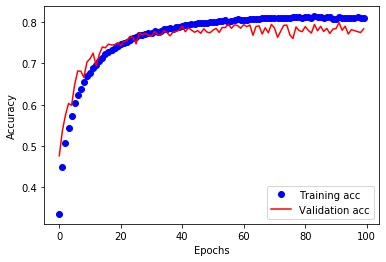

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [18]:
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=100)

Epoch 1/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.6900 - acc: 0.7790
Epoch 2/100
50000/50000 [==============================] - 24s 486us/step - loss: 0.6705 - acc: 0.7843
Epoch 3/100
50000/50000 [==============================] - 24s 484us/step - loss: 0.6676 - acc: 0.7855
Epoch 4/100
50000/50000 [==============================] - 24s 485us/step - loss: 0.6696 - acc: 0.7851
Epoch 5/100
50000/50000 [==============================] - 24s 480us/step - loss: 0.6574 - acc: 0.7879
Epoch 6/100
50000/50000 [==============================] - 24s 484us/step - loss: 0.6608 - acc: 0.7879
Epoch 7/100
50000/50000 [==============================] - 24s 484us/step - loss: 0.6592 - acc: 0.7878
Epoch 8/100
50000/50000 [==============================] - 24s 485us/step - loss: 0.6652 - acc: 0.7877
Epoch 9/100
50000/50000 [==============================] - 24s 481us/step - loss: 0.6594 - acc: 0.7881
Epoch 10/100
50000/50000 [==============================] - 24s 479us/ste

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [19]:
loss_and_acc3 = model.evaluate(x_test, y_test_vec)
print('Test loss = ' + str(loss_and_acc3[0]))
print('Test accuracy = ' + str(loss_and_acc3[1]))

10000/10000 [==============================] - 2s 174us/step
Test loss = 0.7383095815658569
Test accuracy = 0.761
